# Car Price Prediction

# Predicting the sale price of a Car

In [2]:
#importing required libraries 
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#reading the csv file

raw_df = pd.read_csv(r"C:\Users\Lokanathswami\Downloads\cardekho-master\datasets_33080_1320127_car data.csv")
raw_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
#shape
raw_df.shape

(301, 9)

In [5]:
print('The dataset has: \n {} no. of rows \n {} no. of columns'.format(raw_df.shape[0],raw_df.shape[1]))

The dataset has: 
 301 no. of rows 
 9 no. of columns


In [6]:
# checking general information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#column names
col_raw = raw_df.columns
col_raw

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
#Separating categorical variables and numerical variable Method 1

cat_v = ['Car_Name','Fuel_Type', 'Seller_Type', 'Transmission']
num_v = [v for v in col_raw if v not in cat_v]


In [9]:
cat_v,num_v

(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'],
 ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'])

In [10]:
#Separating categorical variables and numerical variable Method 2
numeric_data = raw_df.select_dtypes(include=[np.number])
categorical_data = raw_df.select_dtypes(exclude=[np.number])

numeric_data.shape
categorical_data.shape


(301, 4)

In [11]:
numeric_data.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner'], dtype='object')

In [12]:
categorical_data.columns

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [13]:
# rearranging columns order
raw_df = raw_df [['Car_Name', 'Year', 'Kms_Driven',
                  'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner','Present_Price', 'Selling_Price']]
raw_df.head()

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
0,ritz,2014,27000,Petrol,Dealer,Manual,0,5.59,3.35
1,sx4,2013,43000,Diesel,Dealer,Manual,0,9.54,4.75
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,9.85,7.25
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,4.15,2.85
4,swift,2014,42450,Diesel,Dealer,Manual,0,6.87,4.60


In [14]:
# Displaying unique values present in categorical feature  method 1
for column in cat_v:
    unique_vals = np.unique(raw_df[column])
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    print('\n')
   

The number of values for feature Car_Name :98 -- ['800' 'Activa 3g' 'Activa 4g' 'Bajaj  ct 100' 'Bajaj Avenger 150'
 'Bajaj Avenger 150 street' 'Bajaj Avenger 220' 'Bajaj Avenger 220 dtsi'
 'Bajaj Avenger Street 220' 'Bajaj Discover 100' 'Bajaj Discover 125'
 'Bajaj Dominar 400' 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 135 LS'
 'Bajaj Pulsar 150' 'Bajaj Pulsar 220 F' 'Bajaj Pulsar NS 200'
 'Bajaj Pulsar RS200' 'Hero  CBZ Xtreme' 'Hero  Ignitor Disc'
 'Hero Extreme' 'Hero Glamour' 'Hero Honda CBZ extreme'
 'Hero Honda Passion Pro' 'Hero Hunk' 'Hero Passion Pro'
 'Hero Passion X pro' 'Hero Splender Plus' 'Hero Splender iSmart'
 'Hero Super Splendor' 'Honda Activa 125' 'Honda Activa 4G'
 'Honda CB Hornet 160R' 'Honda CB Shine' 'Honda CB Trigger'
 'Honda CB Unicorn' 'Honda CB twister' 'Honda CBR 150' 'Honda Dream Yuga '
 'Honda Karizma' 'Hyosung GT250R' 'KTM 390 Duke ' 'KTM RC200' 'KTM RC390'
 'Mahindra Mojo XT300' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 350' 'Royal Enfield Classic 

In [15]:
# Displaying unique values present in categorical feature  method 2
for column in cat_v:
    unique_vals = raw_df[column].unique()  
    nr_values = len(unique_vals)
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    print('\n')

The number of values for feature Car_Name :98 -- ['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 'TVS Sport ' 'Honda Drea

In [16]:
#Checking distribution of categorical data
for label in cat_v:
    print(raw_df[label].value_counts(dropna=False))
    print('\n''*******************************')

city                    26
corolla altis           16
verna                   14
fortuner                11
brio                    10
                        ..
Hero Splender Plus       1
Honda Dream Yuga         1
Honda CB Unicorn         1
Bajaj Pulsar  NS 200     1
Mahindra Mojo XT300      1
Name: Car_Name, Length: 98, dtype: int64

*******************************
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

*******************************
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

*******************************
Manual       261
Automatic     40
Name: Transmission, dtype: int64

*******************************


In [17]:
#plotting graph of above for getting better view
# Function to print height of barcharts on the bars

def barh(ax): # for getting height
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))

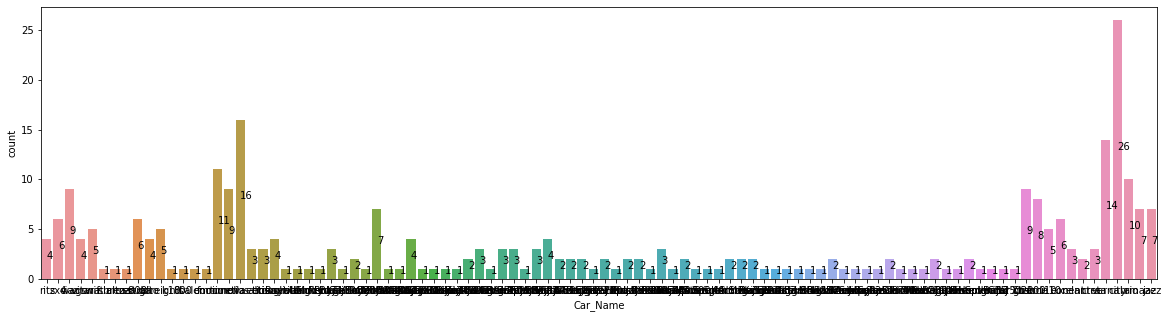

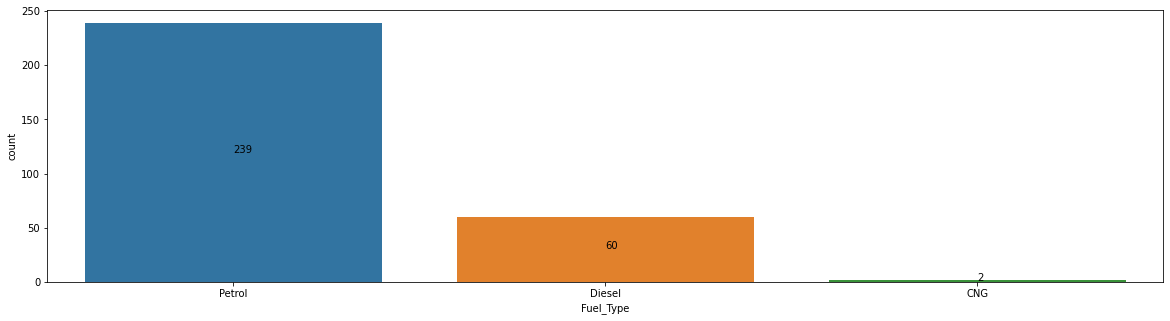

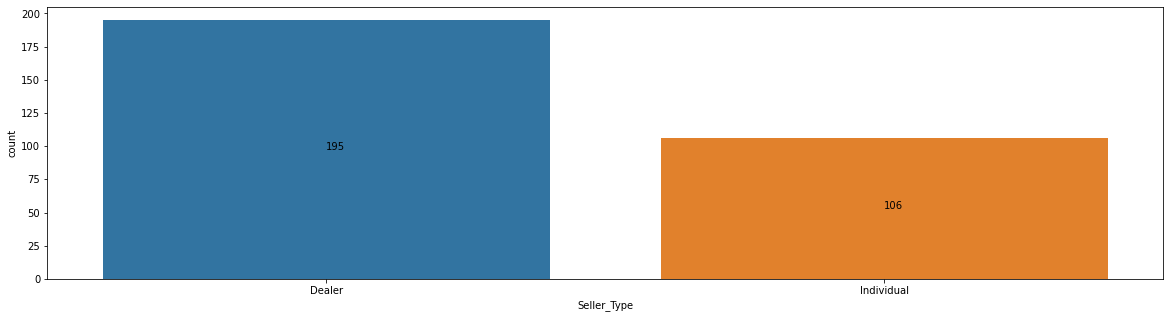

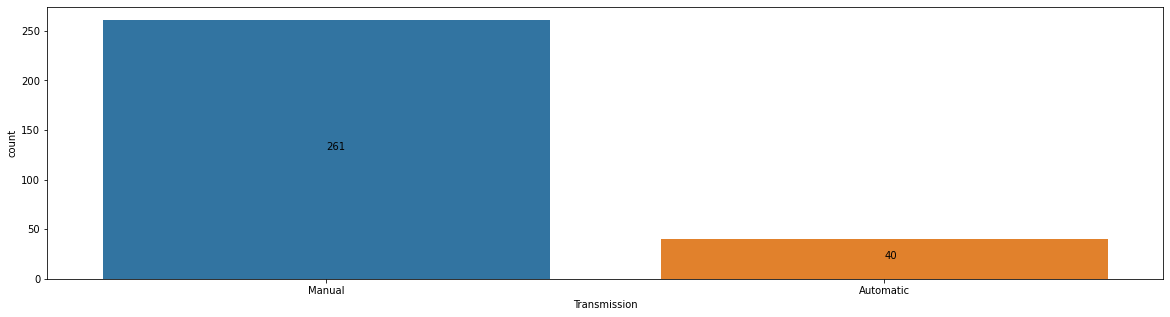

In [18]:
#Let's Plot these distribution

for i in cat_v:  # we are looping over categorical variables and plotting their distributions
    plt.figure(figsize=(20,5))
    ax = sns.countplot(data = raw_df, x=i)
    barh(ax)
    plt.show()

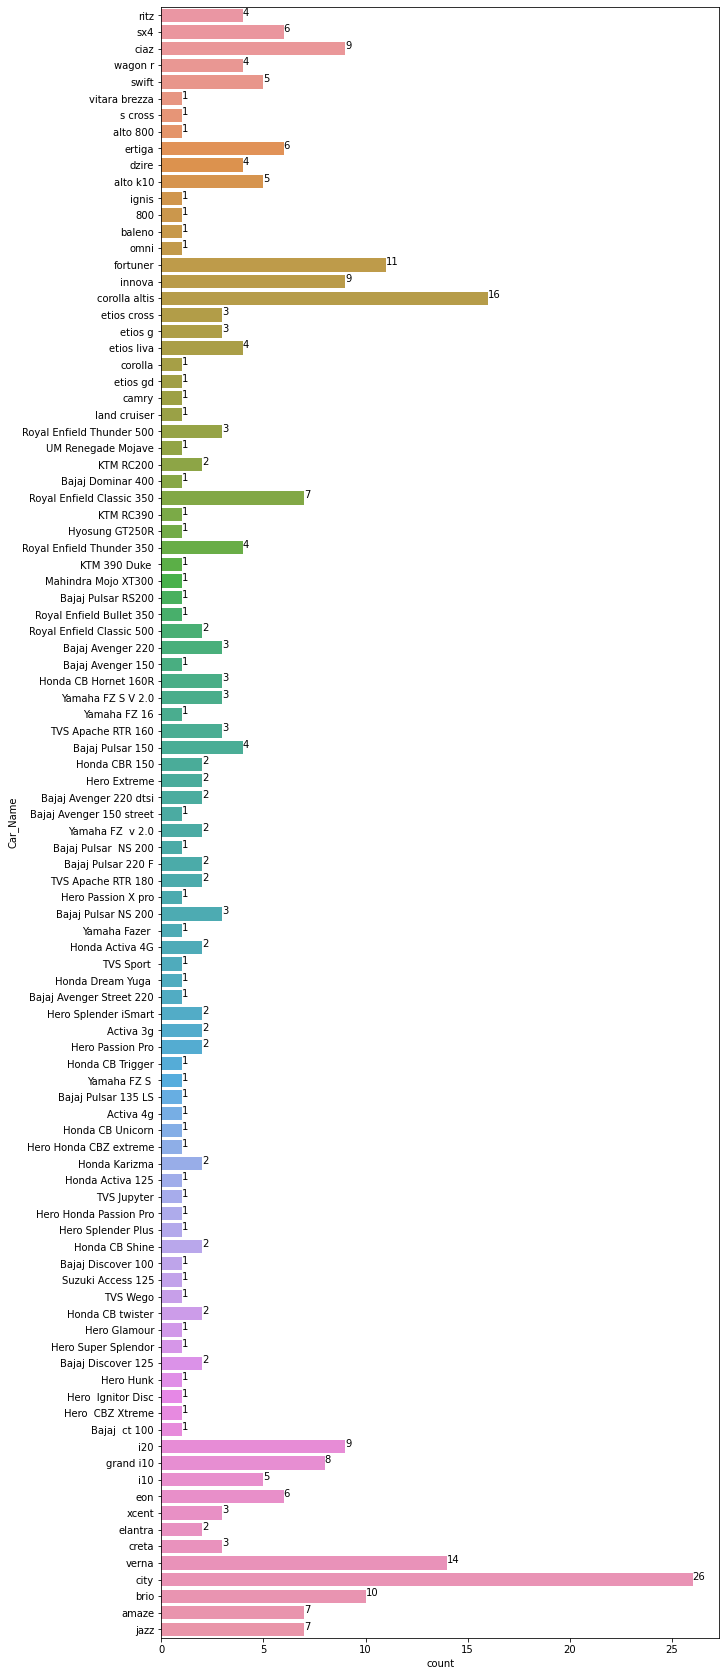

In [19]:
#lets see the car name distribution again

# Function to print width of barcharts on the bars

def barw(ax): 
    
    for p in ax.patches:
        val = p.get_width() #height of the bar
        x = p.get_x()+ p.get_width() # x- position 
        y = p.get_y() + p.get_height()/2 #y-position
        ax.annotate(round(val,2),(x,y))


plt.figure(figsize=(10,30))
ax0 = sns.countplot(data = raw_df, y ='Car_Name',)
barw(ax0)
plt.show()

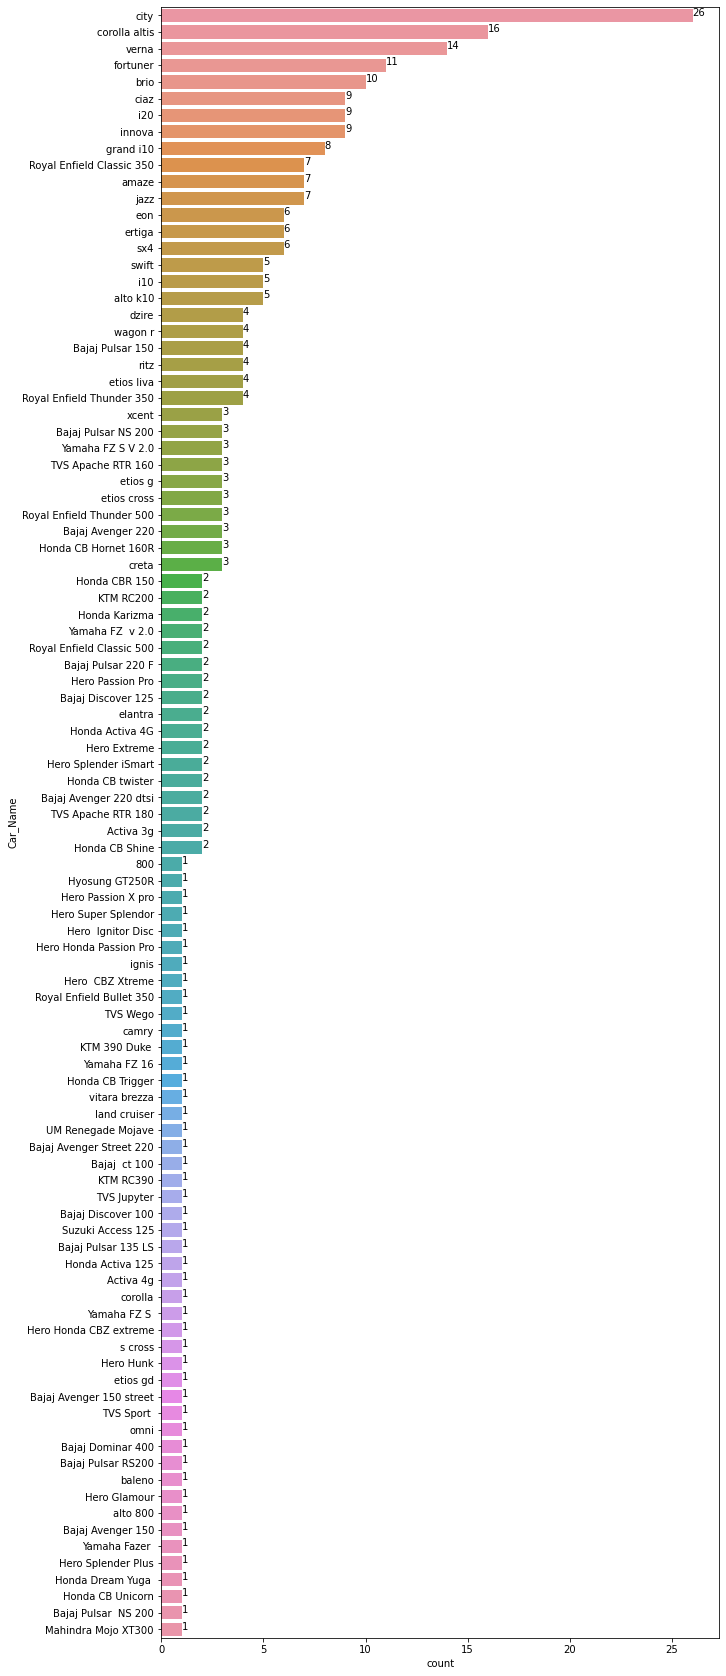

In [20]:
# Univariate Analysis
# we can see that honda city has the highest frequency
# lets sort them in descending order 

#lets see the car name distribution again

plt.figure(figsize=(10,30))
ax1 = sns.countplot(data = raw_df, y ='Car_Name', order = raw_df['Car_Name'].value_counts().index) # order = raw_df['Car_Name'].value_counts().index
barw(ax1)
plt.show()

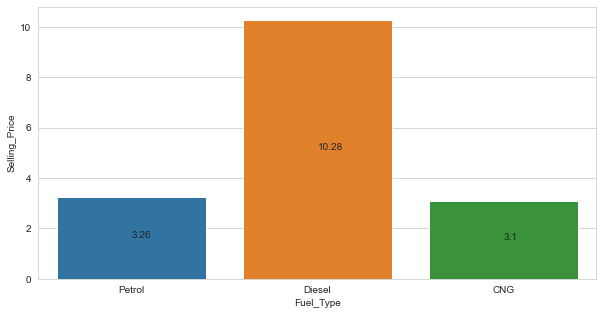

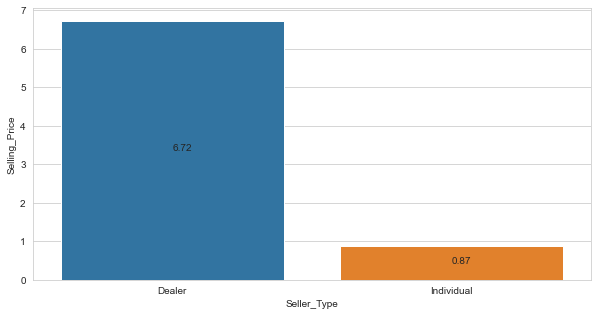

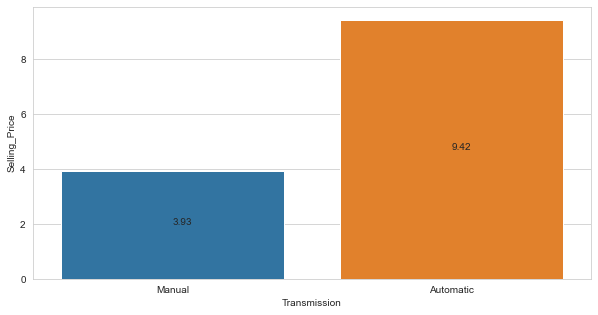

In [21]:
# Bi-Variate Analysis with selling price
# let's chek the distribution of categorical variables with respect to the selling price
for i in [c for c in cat_v if c != 'Car_Name']:
    plt.figure(figsize=(10,5))
    sns.set_style('whitegrid')
    ax3 = sns.barplot(data = raw_df, x=i, y ='Selling_Price',ci=None,estimator = np.mean)
    barh(ax3)
    plt.show()


In [22]:
# Let's check selling price of all vehicles & find out which one is costly
# we are grouping the whole dataset by Car_Name and then sorting in desending order
#So that we can find the car which has highest selling price
# We are doing this in order to plot the barplot in descending order

df_gc = raw_df.groupby('Car_Name').mean()
df_gc.reset_index(inplace= True)
df_gc[['Car_Name','Selling_Price']].sort_values('Selling_Price', ascending =False)

,Car_Name,Selling_Price
88,land cruiser,35.000000
81,fortuner,18.685455
86,innova,12.777778
72,creta,11.800000
74,elantra,11.600000
...,...,...
18,Hero CBZ Xtreme,0.200000
24,Hero Hunk,0.200000
29,Hero Super Splendor,0.200000
3,Bajaj ct 100,0.180000


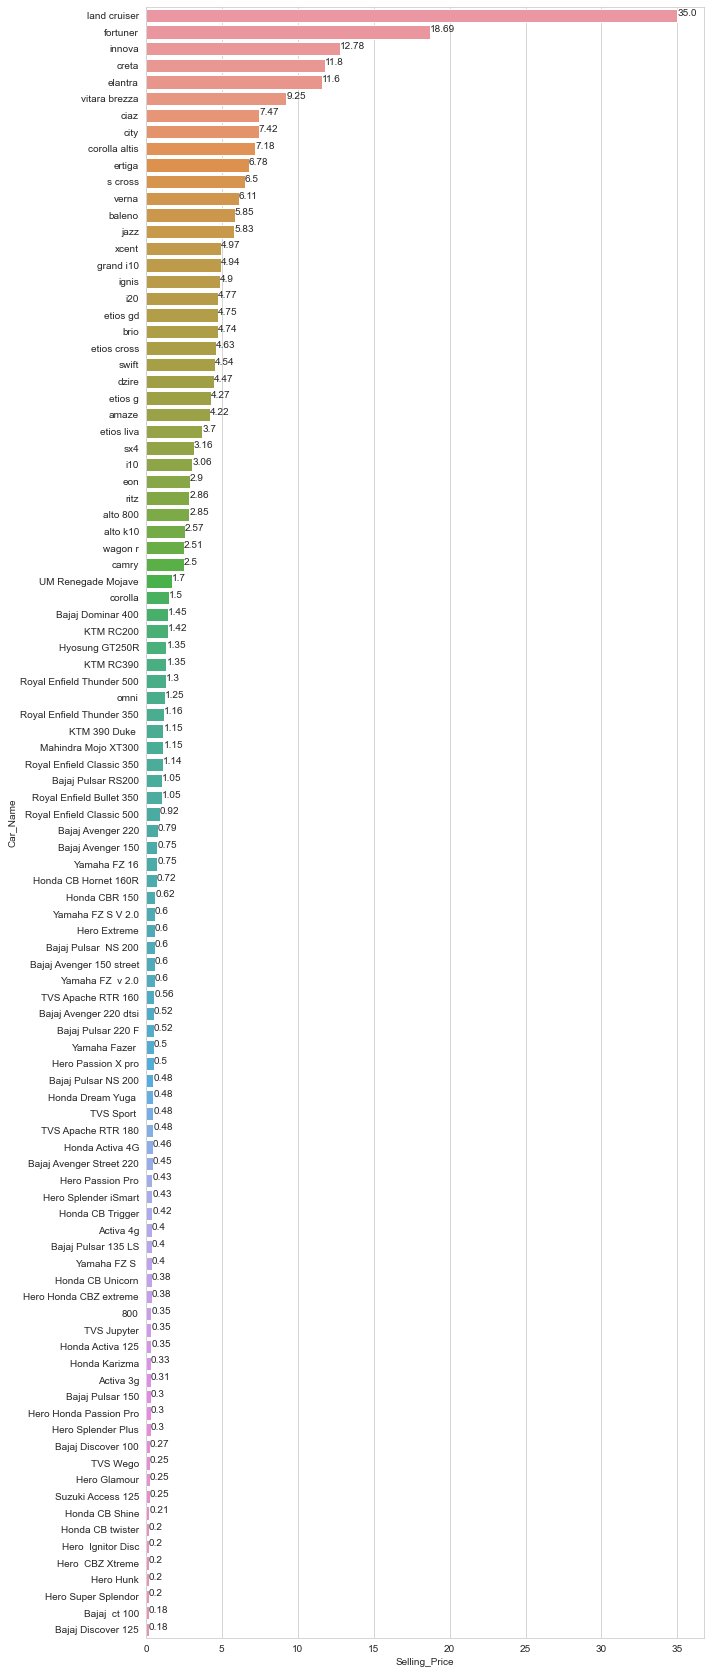

In [23]:
# Plotting Above information on graph
plt.figure(figsize=(10,30))
ax1 = sns.barplot(data = raw_df, x='Selling_Price', y ='Car_Name', order = df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'], ci =None) 
#order = df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'] - We are just giving a series of all car names in an order to print
# we have creted this ordered names by sorting the Selling_Price column of df_gc dataframe 
barw(ax1)
plt.show()


In [24]:
# More Info
type( df_gc.sort_values('Selling_Price',ascending =False)['Car_Name'] )

pandas.core.series.Series

In [25]:
#More info
#We are grouping by Car_Name in order to find 

df_gc = raw_df [['Car_Name', 'Selling_Price']].groupby('Car_Name').agg({'Selling_Price':'mean'})
df_gc.reset_index(inplace=True)
df_gc

,Car_Name,Selling_Price
0,800,0.350000
1,Activa 3g,0.310000
2,Activa 4g,0.400000
3,Bajaj ct 100,0.180000
4,Bajaj Avenger 150,0.750000
...,...,...
93,sx4,3.158333
94,verna,6.107857
95,vitara brezza,9.250000
96,wagon r,2.512500


In [26]:
#Let's check distribution of numerical variables
#numerica varibles
num_v

['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']

In [27]:
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Year,Kms_Driven,Owner,Present_Price,Selling_Price
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,36947.205980,0.043189,7.628472,4.661296
std,2.891554,38886.883882,0.247915,8.644115,5.082812
min,2003.000000,500.000000,0.000000,0.320000,0.100000
5%,2008.000000,3500.000000,0.000000,0.540000,0.250000
25%,2012.000000,15000.000000,0.000000,1.200000,0.900000
35%,2013.000000,21200.000000,0.000000,3.760000,1.950000
50%,2014.000000,32000.000000,0.000000,6.400000,3.600000
75%,2016.000000,48767.000000,0.000000,9.900000,6.000000
85%,2016.000000,58000.000000,0.000000,13.600000,8.250000


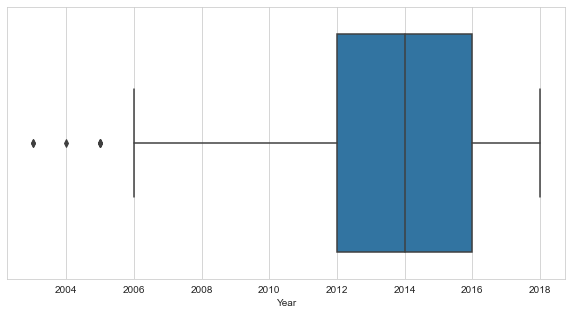

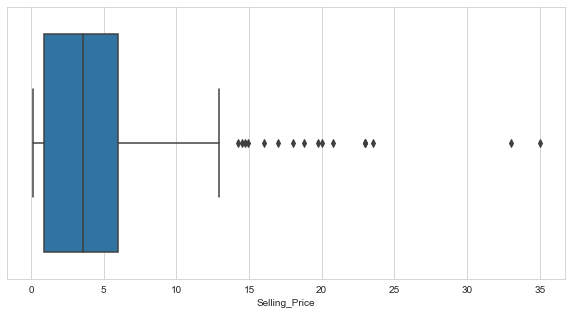

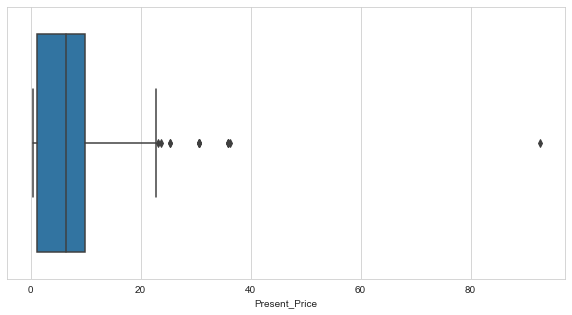

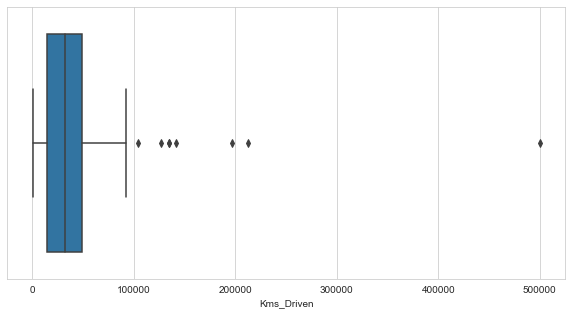

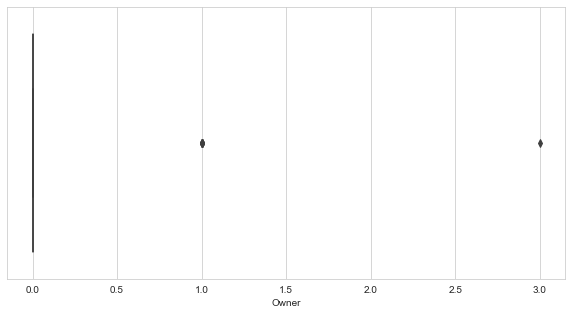

In [28]:
for i in num_v:
    plt.figure(figsize=(10,5))
    sns.boxplot(data= raw_df, x =i)
    plt.show()

In [29]:
#From boxplot owner is a descreate Variablr
#let's check values
raw_df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

<Figure size 2160x1080 with 0 Axes>

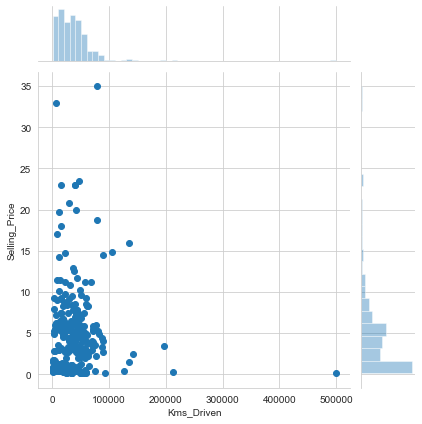

In [30]:
# Drawing a Joint plot between two variable to get Extream outliers
#we get both scatter plot and histogram here (Joint plot)
#We can also use scatter plot
#To see both scaterplot with histogram (distribution of each varible)
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kms_Driven',y = 'Selling_Price')
plt.show()

<Figure size 2160x1080 with 0 Axes>

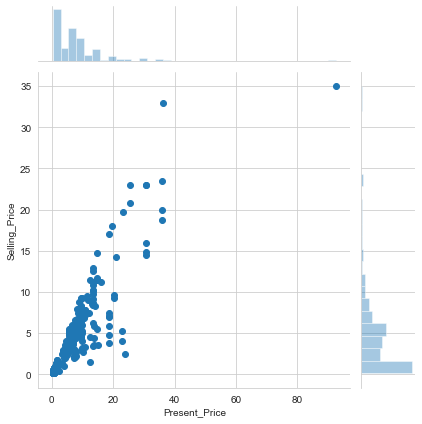

In [31]:
plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Present_Price',y = 'Selling_Price')
plt.show()

In [32]:
#Checking Outlier present @ max value for respective variable 
#checking only for those values .rows from the graph and from description of 'max' row value for 'Kms_Driven' and 'Present_Price'
raw_df.loc[((raw_df['Present_Price'] ==92.600000 ) | (raw_df['Kms_Driven'] ==500000.000000)),:]

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
86,land cruiser,2010,78000,Diesel,Dealer,Manual,0,92.60,35.00
196,Activa 3g,2008,500000,Petrol,Individual,Automatic,0,0.52,0.17


In [33]:
#we check for another values 
raw_df.loc[((raw_df['Car_Name'] =='Activa 3g' )|(raw_df['Present_Price'] ==92.600000 ) | (raw_df['Kms_Driven'] ==500000.000000)),:]

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
86,land cruiser,2010,78000,Diesel,Dealer,Manual,0,92.60,35.00
165,Activa 3g,2016,500,Petrol,Individual,Automatic,0,0.54,0.45
196,Activa 3g,2008,500000,Petrol,Individual,Automatic,0,0.52,0.17


<Figure size 2160x1080 with 0 Axes>

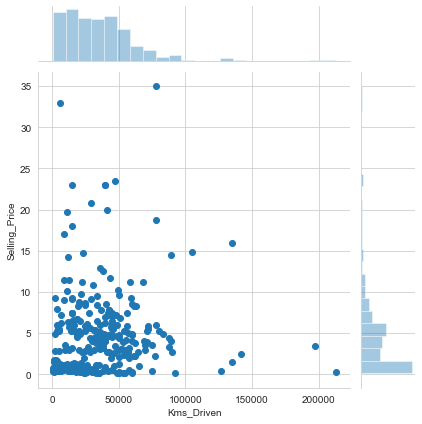

In [34]:
# Removing Outlier
#As we have a very small amount of data points , we are removing only raw_df['Kms_Driven'] ==500000.000000 row, 
# as you can see 500000 is really extream for activa 3g in this dataset

raw_df = raw_df.loc[raw_df['Kms_Driven'] !=500000.000000]

plt.figure(figsize=(30,15))
sns.jointplot(data=raw_df,x= 'Kms_Driven',y = 'Selling_Price')
plt.show()

In [35]:
raw_df.shape

(300, 9)

In [36]:
#As we have removed a row, we are resetting the index
raw_df.reset_index(inplace=True)
raw_df.drop('index', axis =1, inplace= True)
raw_df

,Car_Name,Year,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price
0,ritz,2014,27000,Petrol,Dealer,Manual,0,5.59,3.35
1,sx4,2013,43000,Diesel,Dealer,Manual,0,9.54,4.75
2,ciaz,2017,6900,Petrol,Dealer,Manual,0,9.85,7.25
3,wagon r,2011,5200,Petrol,Dealer,Manual,0,4.15,2.85
4,swift,2014,42450,Diesel,Dealer,Manual,0,6.87,4.60
...,...,...,...,...,...,...,...,...,...
295,city,2016,33988,Diesel,Dealer,Manual,0,11.60,9.50
296,brio,2015,60000,Petrol,Dealer,Manual,0,5.90,4.00
297,city,2009,87934,Petrol,Dealer,Manual,0,11.00,3.35
298,city,2017,9000,Diesel,Dealer,Manual,0,12.50,11.50


In [37]:
#Again percentiles
raw_df.describe(percentiles=[0.05,0.25,0.35,0.5,0.75,0.85,0.95,0.995,0.999])

,Year,Kms_Driven,Owner,Present_Price,Selling_Price
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2013.646667,35403.696667,0.043333,7.652167,4.676267
std,2.877979,28244.294127,0.248317,8.648761,5.084652
min,2003.000000,500.000000,0.000000,0.320000,0.100000
5%,2008.000000,3499.650000,0.000000,0.540000,0.250000
25%,2012.000000,15000.000000,0.000000,1.245000,0.900000
35%,2013.000000,21173.750000,0.000000,3.883500,1.950000
50%,2014.000000,32000.000000,0.000000,6.445000,3.625000
75%,2016.000000,48191.750000,0.000000,9.900000,6.000000
85%,2016.000000,58000.000000,0.000000,13.600000,8.250000


<Figure size 720x720 with 0 Axes>

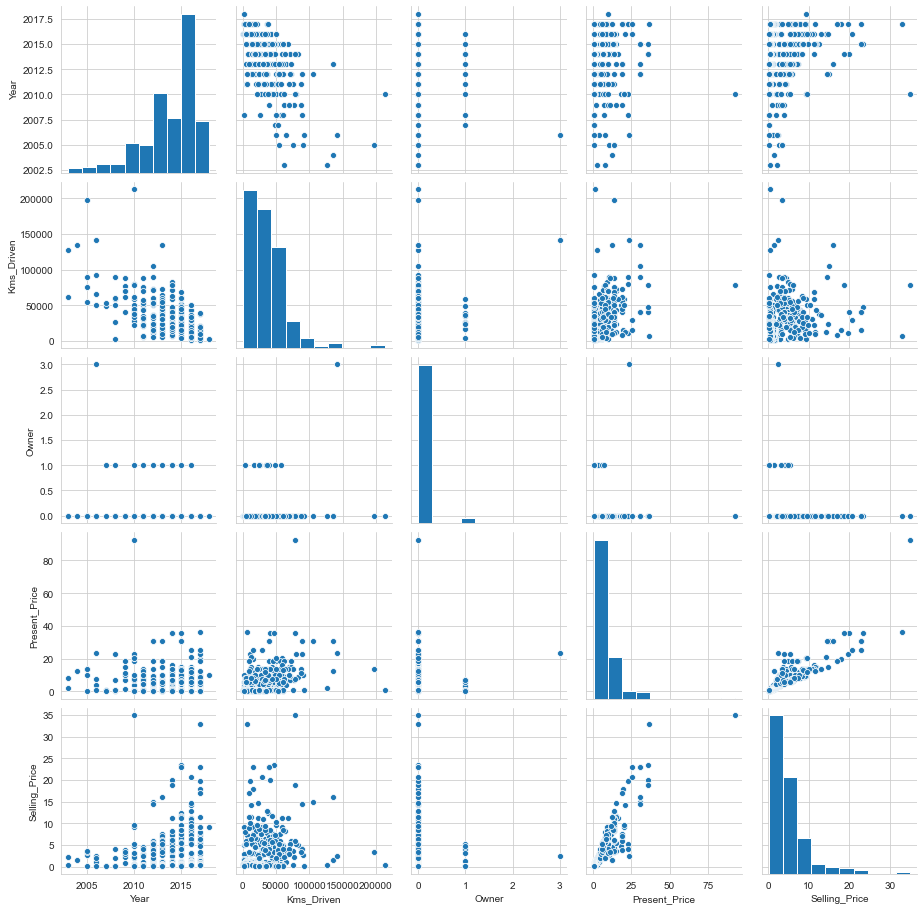

In [38]:
#Lets do a pairplot to see distribution of all numerical variables with selling price
plt.figure(figsize =(10,10))
sns.pairplot(raw_df)
plt.show()

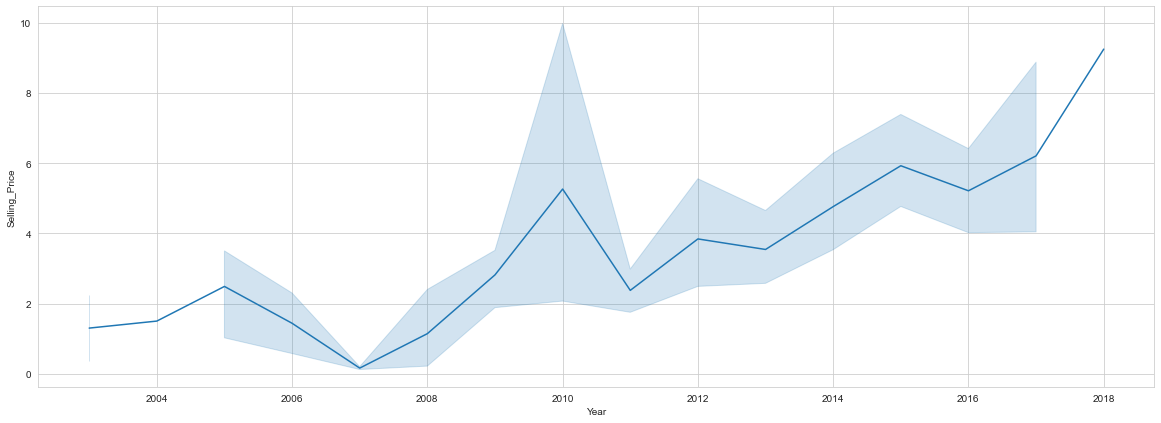

In [39]:
#Let's draw a line plot between 'year' and 'selling price' to get a trend of selling price
#Lets see the selling price trend with year 

plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price', markers=True)
plt.show()

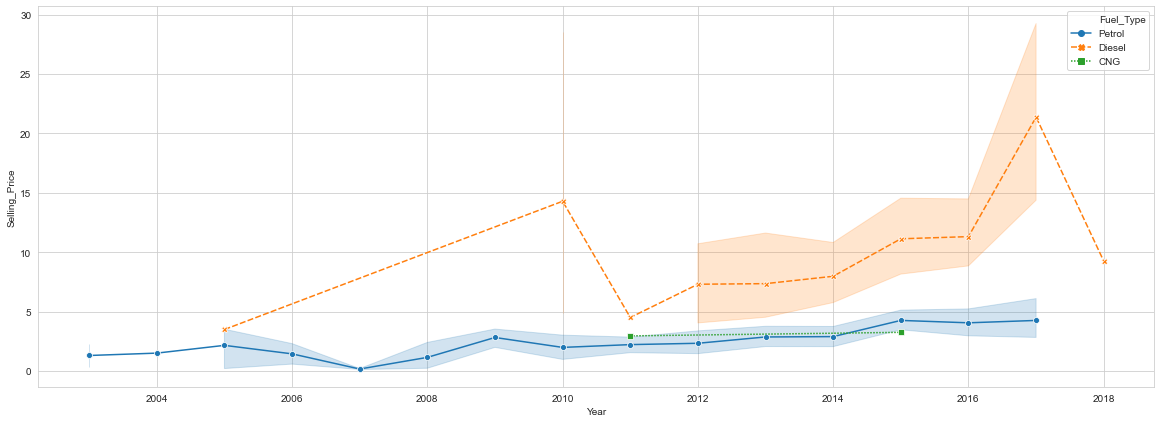

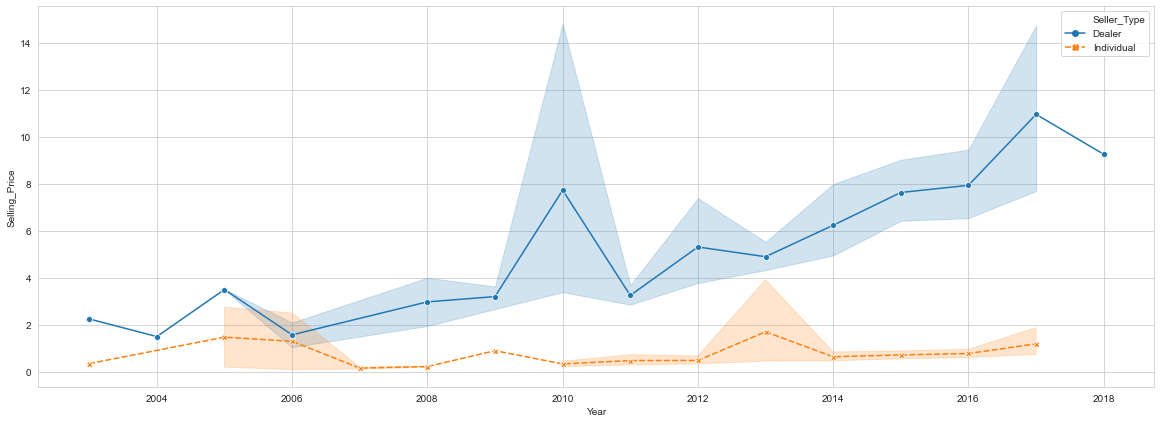

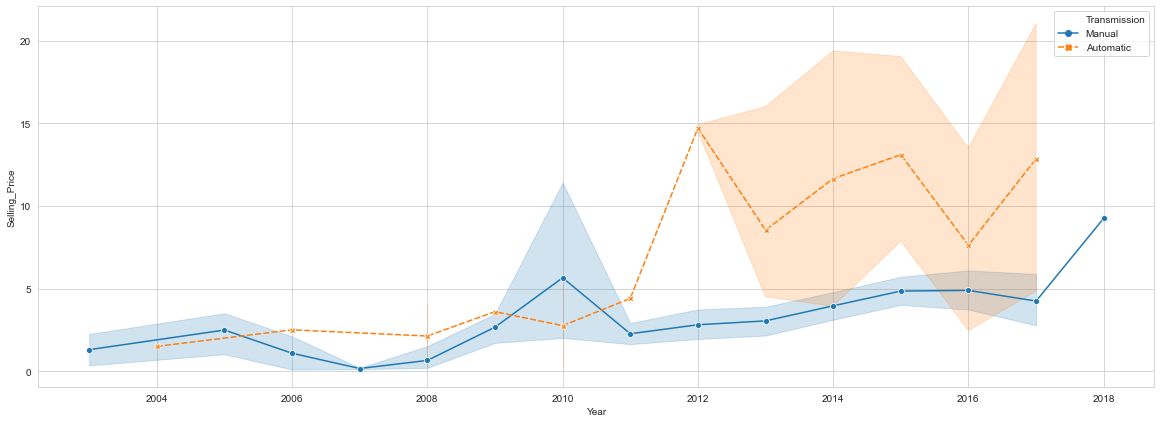

In [40]:
#Let's check trend of selling price with year and other categorical variable
#Checking trend of selling price with respect to cat_v 
for i in [c for c in cat_v if c != 'Car_Name']:
    plt.figure(figsize=(20,7))
    sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue=i,style =i,markers= True)
    #hue - to see trend according to each value of a categorical variable
    #style - to se different line for different values
    # markers - to see the dotted points
    plt.show()

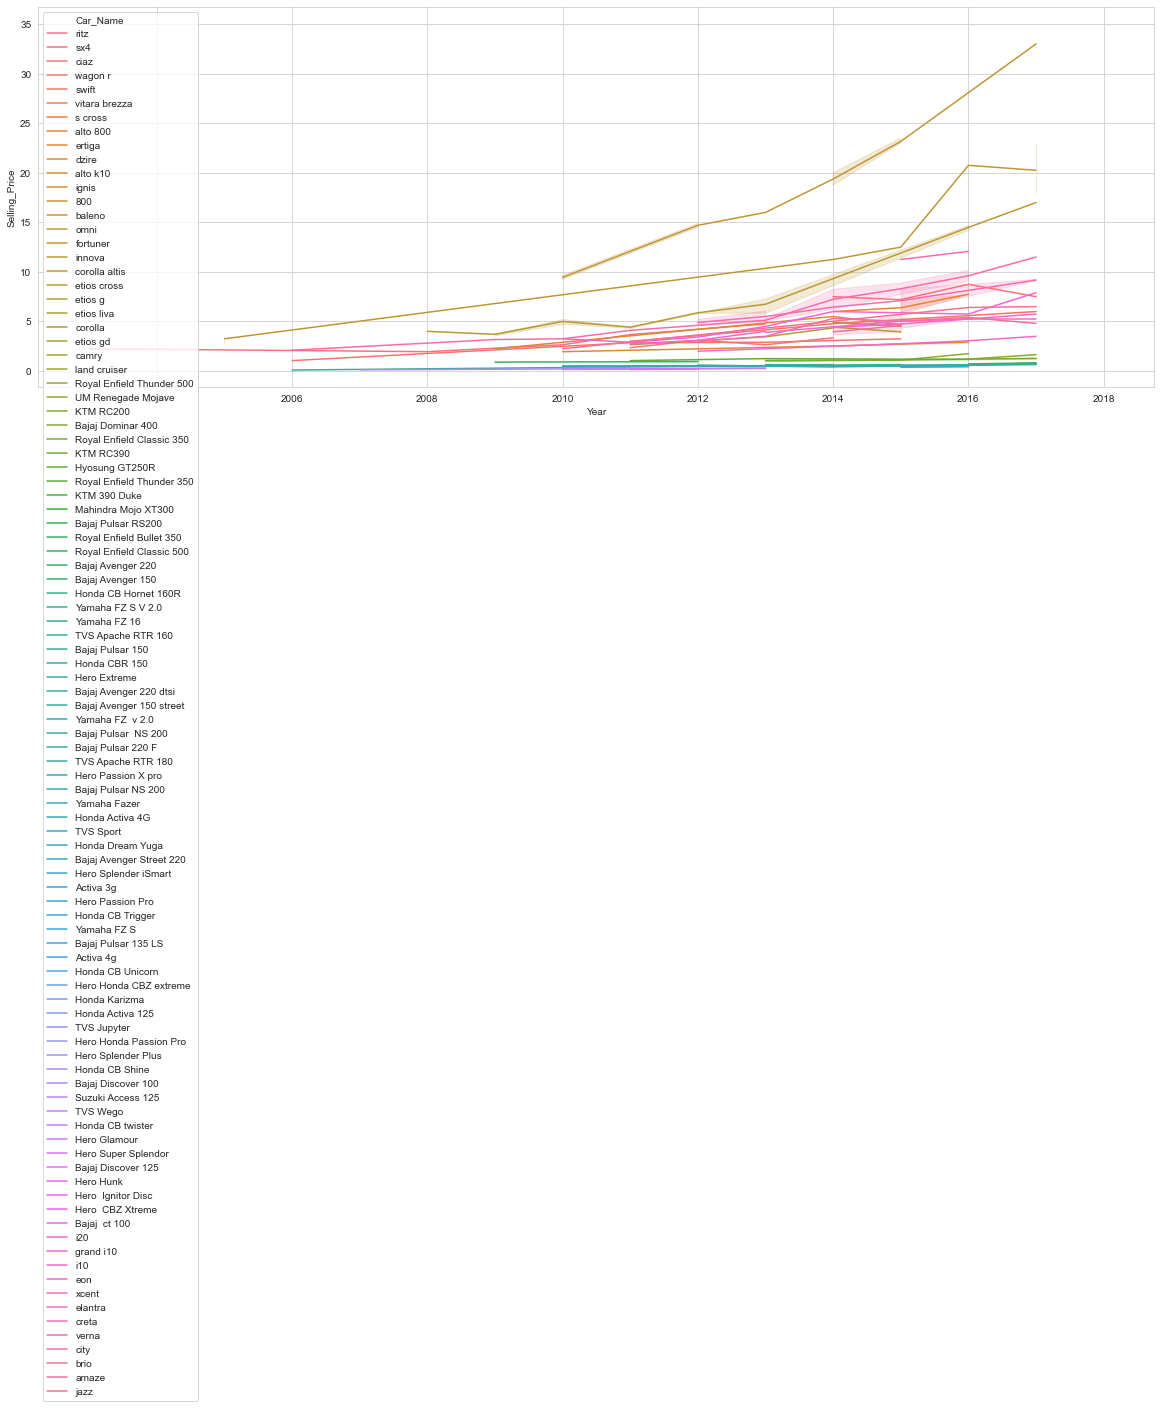

In [41]:
#Checking trend trends for Car Names
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue='Car_Name',estimator =np.mean,markers=True)
plt.show()


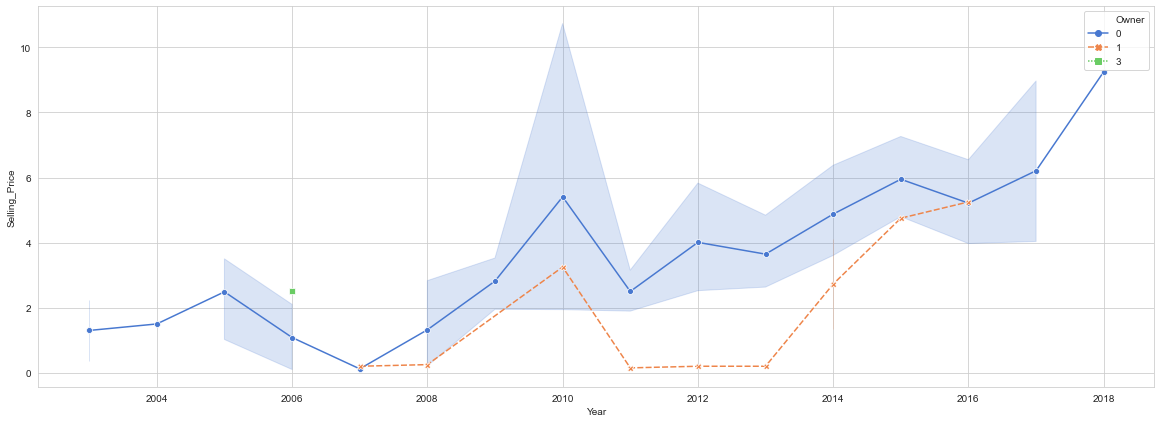

In [42]:
#Checking Trend for owner type
plt.figure(figsize=(20,7))
sns.lineplot(data =raw_df, x='Year',y='Selling_Price',hue='Owner',estimator =np.mean,style ='Owner',palette="muted",markers=True)
plt.show()


In [43]:
# Creating New variable 'Age of vehicle'
# Year - Year of manufacture
# Hence We can create 'Age' variable from it
raw_df['Age'] = 2020 - raw_df['Year']

#Dropping the 'Year' variable
raw_df.drop(['Year'], axis= 1,inplace= True)
raw_df.head()

,Car_Name,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Present_Price,Selling_Price,Age
0,ritz,27000,Petrol,Dealer,Manual,0,5.59,3.35,6
1,sx4,43000,Diesel,Dealer,Manual,0,9.54,4.75,7
2,ciaz,6900,Petrol,Dealer,Manual,0,9.85,7.25,3
3,wagon r,5200,Petrol,Dealer,Manual,0,4.15,2.85,9
4,swift,42450,Diesel,Dealer,Manual,0,6.87,4.60,6


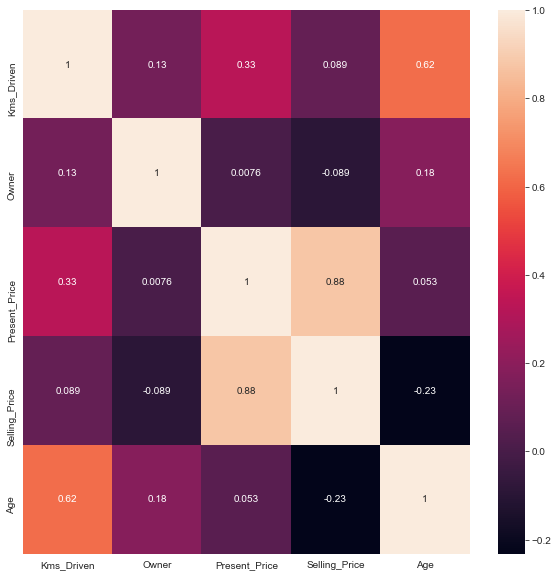

In [44]:
# Heatmap to check the co-relation between Numerical variable & Selling Price
plt.figure(figsize=(10,10))
sns.heatmap(raw_df.corr(),annot =True)
plt.show()

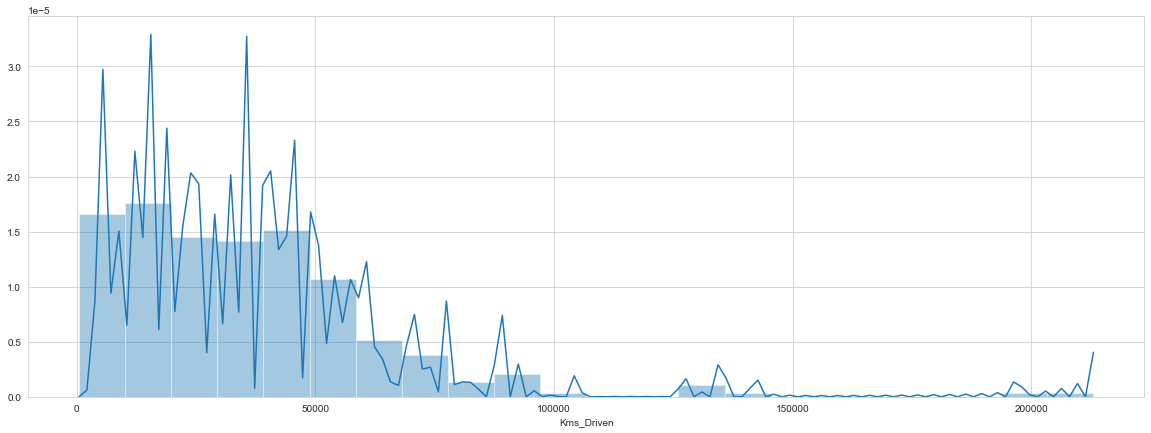

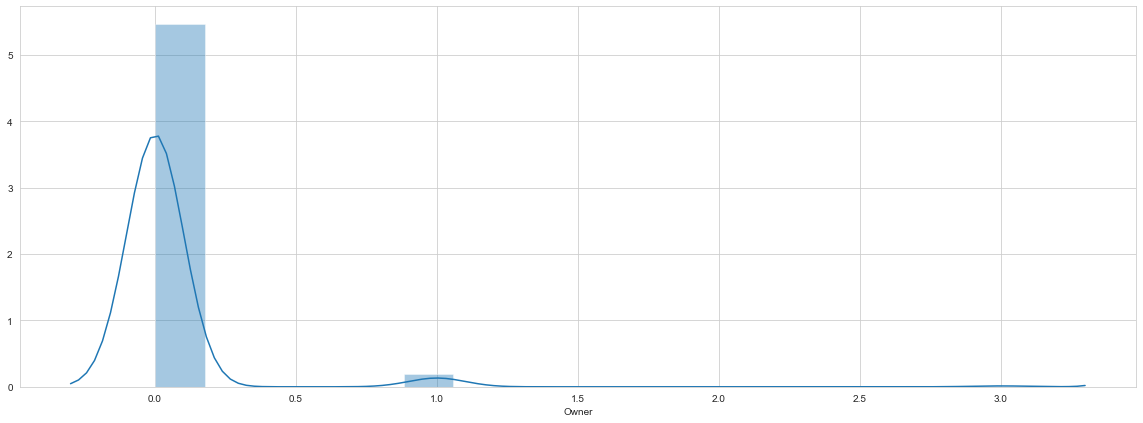

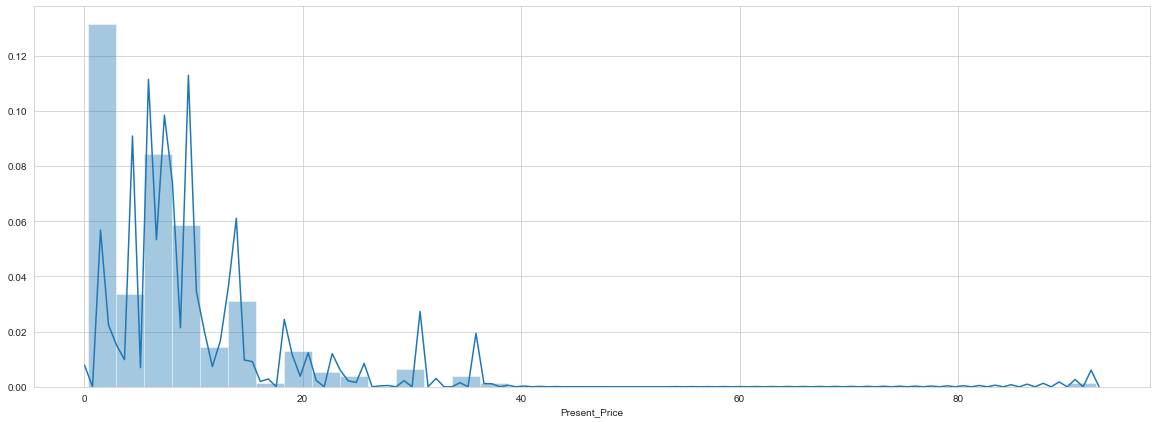

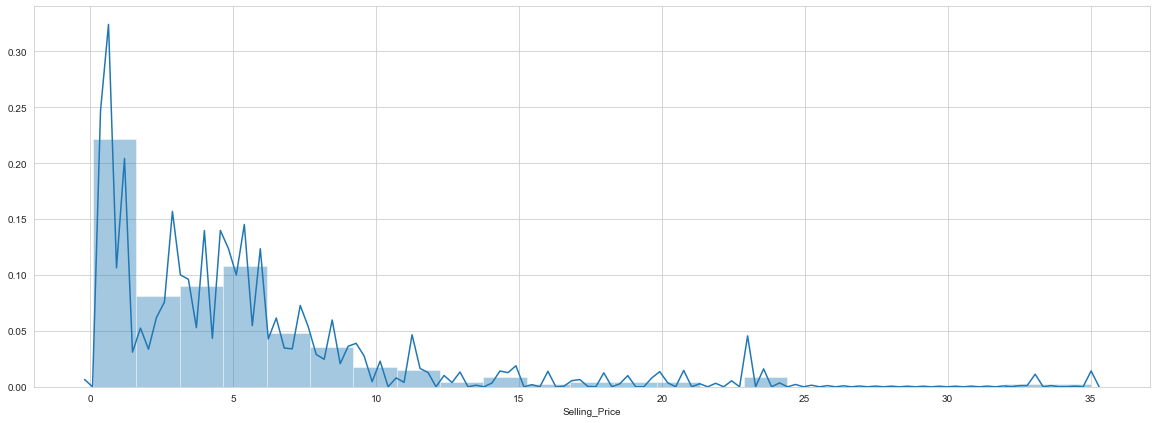

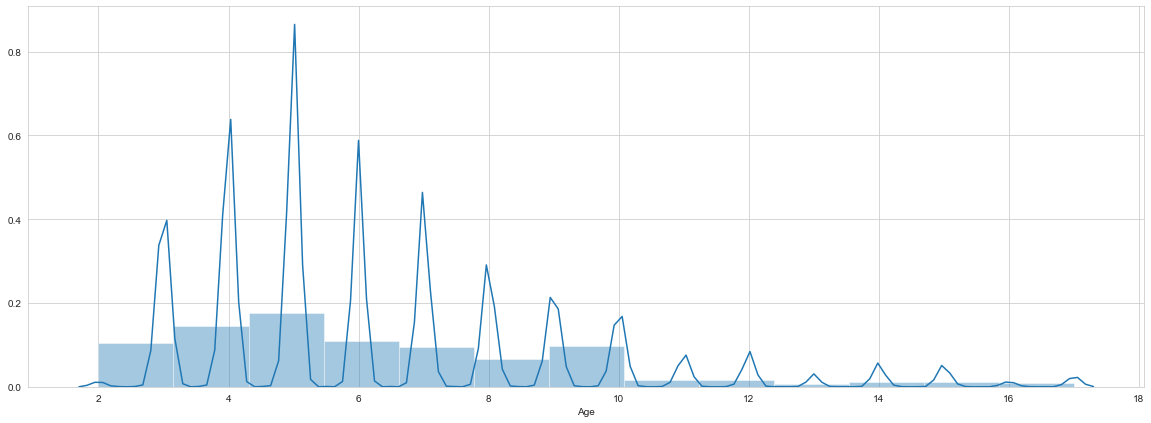

In [45]:
# Distribution of each individual Numerical vehicle 
num_v = [i for i in raw_df.columns if i not in cat_v]
for i in num_v:
    plt.figure(figsize=(20,7))
    sns.distplot(raw_df[i],kde_kws={'bw':0.1})

In [46]:
#Checking skewness of Numerical variable
#Measuring skewness
raw_df.skew(axis=0) # -ve sign ----- > left skewed
                    # +ve sign -----  > right skewed

Kms_Driven       2.182300
Owner            7.603739
Present_Price    4.083894
Selling_Price    2.492529
Age              1.262671
dtype: float64

In [47]:
#Let's do skewness treatment with the skewness present in data
# Treating skewness with PowerTransformer(method='yeo-johnson')
# ['Kms_Driven','Present_Price'] as 'Owner' has only 3 values (there is no continuity) and 'Age' is not that skewed

from sklearn.preprocessing import PowerTransformer
power = PowerTransformer()
power.fit(raw_df[['Kms_Driven','Present_Price']])
sk =pd.DataFrame(power.transform(raw_df[['Kms_Driven','Present_Price']]),columns = ['Kms_Driven','Present_Price'])
sk.head()

,Kms_Driven,Present_Price
0,-0.076216,0.109377
1,0.505730,0.638013
2,-1.306789,0.670879
3,-1.493457,-0.165304
4,0.488258,0.308344


In [48]:
sk.shape

(300, 2)

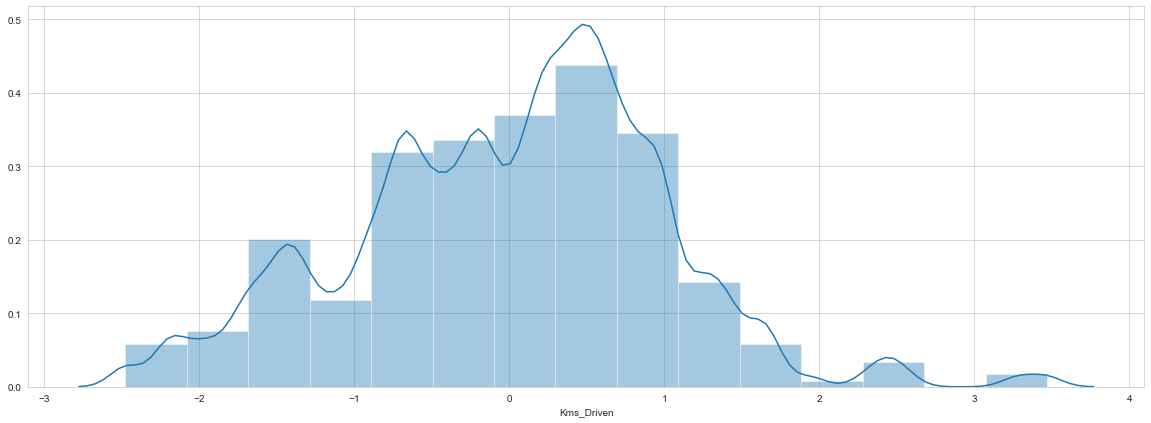

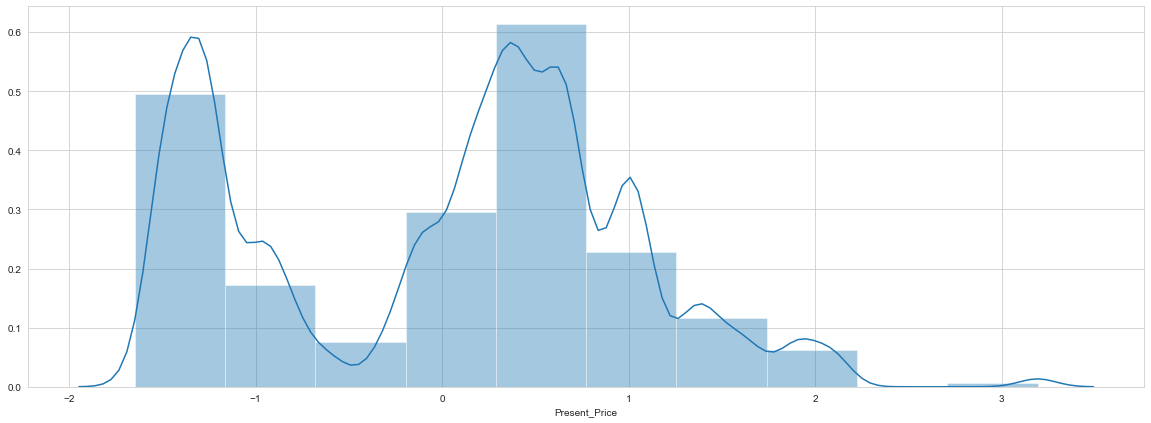

In [49]:
# Now check the distribution once again after power transformation
for i in ['Kms_Driven','Present_Price']:
    plt.figure(figsize=(20,7))
    sns.distplot(sk[i],kde_kws={'bw':0.1})


In [50]:
# Removing old distribution and adding new distribution
# Removing ['Kms_Driven','Present_Price']
raw_df.drop(['Kms_Driven','Present_Price'],axis =1, inplace =True)
df_sk = pd.concat([sk,raw_df],axis =1)
df_sk.head()

,Kms_Driven,Present_Price,Car_Name,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price,Age
0,-0.076216,0.109377,ritz,Petrol,Dealer,Manual,0,3.35,6
1,0.505730,0.638013,sx4,Diesel,Dealer,Manual,0,4.75,7
2,-1.306789,0.670879,ciaz,Petrol,Dealer,Manual,0,7.25,3
3,-1.493457,-0.165304,wagon r,Petrol,Dealer,Manual,0,2.85,9
4,0.488258,0.308344,swift,Diesel,Dealer,Manual,0,4.60,6


In [51]:
# Checking Missing Value
df_sk.isnull().sum()

Kms_Driven       0
Present_Price    0
Car_Name         0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
Selling_Price    0
Age              0
dtype: int64

# Feature Engineering

In [52]:
cat_v

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [53]:
num_v = [i for i in df_sk.columns if i not in cat_v]
num_v

['Kms_Driven', 'Present_Price', 'Owner', 'Selling_Price', 'Age']

In [54]:
#unique values in cat_v
for i in cat_v:
    print('Total number of unique values in {} is {}'.format(i, len(df_sk[i].unique())))

Total number of unique values in Car_Name is 98
Total number of unique values in Fuel_Type is 3
Total number of unique values in Seller_Type is 2
Total number of unique values in Transmission is 2


In [55]:
#Encoding Fuel_Type, Seller_Type, Transmission

dummy = pd.get_dummies(df_sk[['Fuel_Type', 'Seller_Type', 'Transmission']],drop_first= True)
dummy

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0,1,0,1
1,1,0,0,1
2,0,1,0,1
3,0,1,0,1
4,1,0,0,1
...,...,...,...,...
295,1,0,0,1
296,0,1,0,1
297,0,1,0,1
298,1,0,0,1


In [56]:
# Removing Older variables & concating New Variables
df_t1 = pd.concat([dummy,df_sk],axis =1)
df_t1.drop(['Fuel_Type', 'Seller_Type', 'Transmission'],axis =1, inplace= True)
df_t1

,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Car_Name,Owner,Selling_Price,Age
0,0,1,0,1,-0.076216,0.109377,ritz,0,3.35,6
1,1,0,0,1,0.505730,0.638013,sx4,0,4.75,7
2,0,1,0,1,-1.306789,0.670879,ciaz,0,7.25,3
3,0,1,0,1,-1.493457,-0.165304,wagon r,0,2.85,9
4,1,0,0,1,0.488258,0.308344,swift,0,4.60,6
...,...,...,...,...,...,...,...,...,...,...
295,1,0,0,1,0.199199,0.840853,city,0,9.50,4
296,0,1,0,1,0.987829,0.160806,brio,0,4.00,5
297,0,1,0,1,1.618745,0.785312,city,0,3.35,11
298,1,0,0,1,-1.112871,0.919526,city,0,11.50,3


In [ ]:
# installing liabrary for categorical encoder
#!pip install category_encoders

In [59]:
# LeaveOneOutEncoding
from category_encoders.leave_one_out import LeaveOneOutEncoder
looe = LeaveOneOutEncoder(random_state = 10)
looe.fit(df_t1['Car_Name'],df_t1['Selling_Price'])

dum = looe.transform(df_t1['Car_Name'])
dum

,Car_Name
0,2.862500
1,3.158333
2,7.472222
3,2.512500
4,4.540000
...,...
295,7.419231
296,4.745000
297,7.419231
298,7.419231


In [60]:
# Removing older value & adding Newer value
df_t1.drop('Car_Name', axis =1, inplace= True) # Dropping the Car_Name column
df_final= pd.concat([dum,df_t1],axis=1)
df_final

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Selling_Price,Age
0,2.862500,0,1,0,1,-0.076216,0.109377,0,3.35,6
1,3.158333,1,0,0,1,0.505730,0.638013,0,4.75,7
2,7.472222,0,1,0,1,-1.306789,0.670879,0,7.25,3
3,2.512500,0,1,0,1,-1.493457,-0.165304,0,2.85,9
4,4.540000,1,0,0,1,0.488258,0.308344,0,4.60,6
...,...,...,...,...,...,...,...,...,...,...
295,7.419231,1,0,0,1,0.199199,0.840853,0,9.50,4
296,4.745000,0,1,0,1,0.987829,0.160806,0,4.00,5
297,7.419231,0,1,0,1,1.618745,0.785312,0,3.35,11
298,7.419231,1,0,0,1,-1.112871,0.919526,0,11.50,3


# Model Building

In [61]:
#Splitting into X and y

y = df_final.pop('Selling_Price')
X = df_final
X

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Age
0,2.862500,0,1,0,1,-0.076216,0.109377,0,6
1,3.158333,1,0,0,1,0.505730,0.638013,0,7
2,7.472222,0,1,0,1,-1.306789,0.670879,0,3
3,2.512500,0,1,0,1,-1.493457,-0.165304,0,9
4,4.540000,1,0,0,1,0.488258,0.308344,0,6
...,...,...,...,...,...,...,...,...,...
295,7.419231,1,0,0,1,0.199199,0.840853,0,4
296,4.745000,0,1,0,1,0.987829,0.160806,0,5
297,7.419231,0,1,0,1,1.618745,0.785312,0,11
298,7.419231,1,0,0,1,-1.112871,0.919526,0,3


In [62]:
# columns of X
colx = X.columns
colx

Index(['Car_Name', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual', 'Kms_Driven',
       'Present_Price', 'Owner', 'Age'],
      dtype='object')

In [63]:
#Spliting into train and test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7, random_state = 100)
X_train.head()

,Car_Name,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Kms_Driven,Present_Price,Owner,Age
283,4.745000,0,1,0,1,-1.046608,0.160806,0,7
97,7.183125,0,1,0,1,-1.138680,1.349751,0,3
275,7.419231,0,1,0,1,-0.172173,1.009038,0,5
262,5.828571,0,1,0,1,-0.621988,0.421184,0,4
132,0.790000,0,1,1,1,-1.724197,-1.228426,0,3


In [64]:
print('Shape of X_train --- > {} and X_test --- > {}'.format(X_train.shape,X_test.shape))

Shape of X_train --- > (210, 9) and X_test --- > (90, 9)


In [65]:
print('Shape of y_train --- > {} and y_test --- > {}'.format(y_train.shape,y_test.shape))

Shape of y_train --- > (210,) and y_test --- > (90,)


In [66]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train,y_train)

y_train_pred = linear.predict(X_train)
y_test_pred = linear.predict(X_test)

In [67]:
#Scoring 
from sklearn.metrics import mean_squared_error as mse

print('mse for train : {}'.format(round(mse(y_train,y_train_pred),2)))
print('mse for test : {}'.format(round(mse(y_test,y_test_pred),2)))

mse for train : 4.7
mse for test : 5.49


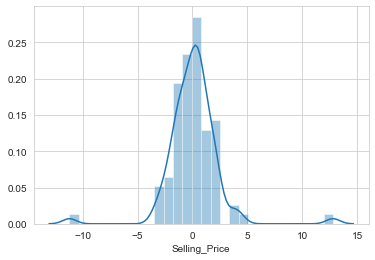

In [68]:
#Checking distribution of errors

sns.distplot(y_test-y_test_pred)

In [69]:
# Create a model with RandomForest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 20, stop = 1200, num = 15)]
max_features = ['auto', 'sqrt']
max_depth = [i for i in range(2,11,2)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [20, 104, 188, 272, 357, 441, 525, 610, 694, 778, 862, 947, 1031, 1115, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
#Doing a cross validation to find best parameters

rf= RandomForestRegressor(n_estimators=100,criterion='mse', 
                                 max_depth=10, min_samples_split=10,
                                 min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)


grid_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,scoring = 'neg_mean_squared_error',random_state =100)

grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.1s finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   min_samples_split=10,
                                                   n_jobs=-1,
                                                   random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [20, 104, 188, 272, 357,
                                                         441, 525, 610, 694,
                                                         778, 862, 947, 1031,
                                                         1115, 1200]},
    

In [71]:
#Best parameters

grid_rf.best_params_

{'n_estimators': 20,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 8}

In [72]:
#model with best parameters

rf= RandomForestRegressor(n_estimators=20,criterion='mse', 
                                 max_depth=8, min_samples_split=5,
                                 min_samples_leaf=2, min_weight_fraction_leaf=0.0,
                                 max_features='auto', bootstrap=True,n_jobs=-1, random_state=100, verbose=0)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=20, n_jobs=-1, random_state=100)

In [73]:
#Prediction

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

#Scoring
print('mse for train : {}'.format(round(mse(y_train,y_train_pred),2)))
print('mse for test : {}'.format(round(mse(y_test,y_test_pred),2)))

mse for train : 1.29
mse for test : 2.68


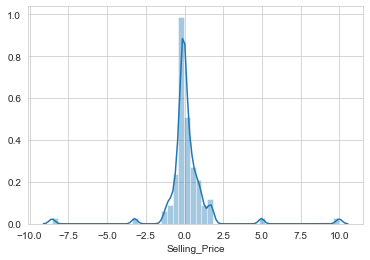

In [74]:
#Checking error distribution

sns.distplot(y_test-y_test_pred)

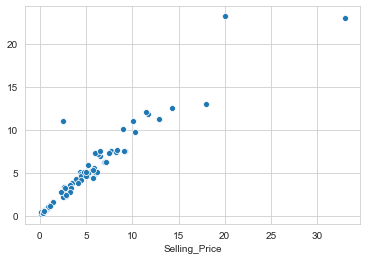

In [75]:
#Scatterplot

sns.scatterplot(y_test,y_test_pred)

# Thank You